In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../../news/scraping_result/kr/2018_complement1/2018_complement1_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2018_complement1/2018_complement1_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2018_complement1/2018_complement1_(KR)BlockMedia.csv', error_bad_lines=False))


In [2]:
text = data[['main article']].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)




In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [4]:
text['main article']

0    \n\n\n\n\n비트코인 가격이 15일 들어 폭락했다.   출처=업비트 홈페이지 ...
1    \n\n\n\n\n사진=업비트 화면 갈무리\n\n                   ...
2    \n\n\n\n\n사진=게티이미지뱅크 \n\n                     ...
3    \n\n\n\n\n\n\n                            올초 비...
4    \n\n\n\n\n각각 미래 비트코인 가격이 제로(0)와 100만달러가 될 것으로 ...
                           ...                        
0    [블록미디어 대학생 인턴 기자 최동녘]현지시각 21일 외신 블룸버그에 따르면, 브라...
1    지난 5월 빗썸은 세계최초로 팝체인을 빗썸 프로에 상장한다고 발표했다. 발표 직후 ...
2                                                  nan
3    크립토코인뉴스(CCN)은 11일(현지시간) SEC가 올해 들어 스타트업들에 대한 조...
4    ▲ 선서 중인 홍남기 국무조정실장홍남기 국무조정실장은 지난 10일 정부세종청사에서 ...
Name: main article, Length: 149, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [6]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [7]:
text['pos tag']

0    [(비트코인, NNP), (가격, NNG), (이, JKS), (15, SN), (...
1    [(사진, NNG), (=, SY), (업, NNG), (비트, NNG), (화면,...
2    [(사진, NNG), (=, SY), (게티, NNP), (이미지, NNP), (뱅...
3    [(올, MM), (초, NNB), (비트코인, NNP), (가격, NNG), (이...
4    [(각각, MAG), (미래, NNG), (비트코인, NNP), (가격, NNG),...
                           ...                        
0    [([, SSO), (블록, NNG), (미디어, NNG), (대학생, NNG), ...
1    [(지난, VV+ETM), (5, SN), (월, NNBC), (빗, NNG), (...
2                                          [(nan, SL)]
3    [(크, IC), (립, NNP), (토코, NNP), (인, VCP+ETM), (...
4    [(▲, SY), (선서, NNG), (중, NNB), (인, VCP+ETM), (...
Name: pos tag, Length: 149, dtype: object

In [8]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC','VCP+ETM')])

In [9]:
text['main article']

0    [비트코인, 가격, 일, 들, 폭락, 했, 다, ., 출처, =, 업, 비트, 홈페...
1    [사진, =, 업, 비트, 화면, 갈무리, 비트코인, 가격, 지난, 월, 일, 이후...
2    [사진, =, 게티, 이미지, 뱅크, 전날, 만, 원대, 였, 던, 가상, 화폐, ...
3    [올, 초, 비트코인, 가격, 만, 원, 대, 치솟, ‘, 투자, 광풍, ’, 불러...
4    [각각, 미래, 비트코인, 가격, 제로, (, ), 와, 만, 달러, 될, 것, 전...
                           ...                        
0    [[, 블록, 미디어, 대학생, 인턴, 기자, 최, 동녘, ], 현지, 시각, 일,...
1    [지난, 월, 빗, 썸, 세계, 최초, 팝, 체인, 빗, 썸, 프로, 상장, 한다고...
2                                                [nan]
3    [크, 립, 토코, 뉴스, (, CCN, ), 일, (, 현지, 시간, ), SEC...
4    [▲, 선서, 중, 홍남기, 국무, 조정, 실장, 홍남기, 국무, 조정, 실장, 지...
Name: main article, Length: 149, dtype: object

In [10]:
import csv
stopword_list =[]
f = open('../../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [11]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0    [비트코인, 가격, 폭락, 출처, 비트, 홈페이지, 화면, 갈무리, 가상, 화폐, ...
1    [사진, 비트, 화면, 갈무리, 비트코인, 가격, 이후, 개월, 붕괴, 오랜, 기간...
2    [사진, 게티, 이미지, 뱅크, 전날, 원대, 가상, 화폐, 암호, 화폐, 비트코인...
3    [비트코인, 가격, 치솟, 투자, 광풍, 불러, 가상, 화폐, 암호, 화폐, 최근,...
4    [각각, 미래, 비트코인, 가격, 제로, 달러, 전망, 누리엘, 루비니, 교수, 왼...
                           ...                        
0    [블록, 미디어, 대학생, 인턴, 동녘, 현지, 시각, 외신, 블룸버그, 따르, 브...
1    [세계, 최초, 체인, 프로, 상장, 한다고, 발표, 발표, 직후, 커뮤니티, 체인...
2                                                [nan]
3    [토코, 뉴스, CCN, 현지, 시간, SEC, 올해, 스타트업, 대한, 조사, 과...
4    [선서, 홍남기, 국무, 조정, 실장, 홍남기, 국무, 조정, 실장, 정부세종청사,...
Name: main article, Length: 149, dtype: object


In [12]:
article_contents = tokenized_doc.values.tolist()

In [13]:
len(tokenized_doc)

149

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [15]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [16]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [17]:
# article_contents_tfidf

In [18]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [19]:
word2id = defaultdict(lambda: 0)

In [20]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [21]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [22]:
len(tf_idf_result)

4789

In [23]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

4789


In [24]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [25]:
sentences = article_contents

In [26]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

25786

In [27]:
from gensim.models import Word2Vec

In [28]:
model = Word2Vec(sentences, min_count=1)

In [29]:
len(model.wv.vocab)

4789

In [30]:
# model.wv.vocab

In [31]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [32]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [33]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [34]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [35]:
temp_cluster_result['cluster'] = assigned_clusters

In [36]:
temp_cluster_result['raw_data'] = X.tolist()

In [37]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [38]:
from sklearn.metrics import pairwise_distances

In [39]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [40]:
len(cosine_centroid_list)

4789

In [41]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [42]:
sum(temp_distance[3])

277.64593172757486

In [43]:
import scipy.spatial.distance as dist

In [44]:
dist.cosine(X[0],cosine_centroid_list[0])

0.00024641095163002724

In [45]:
dist.euclidean(X[0],cosine_centroid_list[0])

1.336274537148944

In [46]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [47]:
len(tf_idf_value)

4789

In [48]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [49]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소 , 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
167,"[0.10601557046175003, -0.46091127395629883, -0...",블록체인,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000148,0.409124,0.591024,NaN
9,"[0.10496821999549866, -0.4476616084575653, -0....",화폐,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000204,0.398654,0.601549,NaN
10,"[0.09169803559780121, -0.37547409534454346, -0...",암호,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000244,0.329393,0.670851,NaN
517,"[0.08059937506914139, -0.3413468897342682, -0....",기술,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000235,0.166710,0.833525,NaN
0,"[0.06948157399892807, -0.32006287574768066, -0...",비트코인,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000246,0.156240,0.844006,NaN
102,"[0.0752394050359726, -0.32022830843925476, -0....",거래,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000242,0.146576,0.853666,NaN
234,"[0.07095327973365784, -0.2803310453891754, -0....",서비스,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000265,0.127247,0.873018,NaN
45,"[0.05466802418231964, -0.2541303336620331, -0....",코인,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000777,0.119999,0.880778,NaN
23,"[0.059973154217004776, -0.26264211535453796, -...",거래소,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000395,0.117583,0.882812,NaN
565,"[0.06925603002309799, -0.302102655172348, -0.1...",한다,0,"[0.0061919154, -0.026193384, -0.010475525, 0.0...",0.000209,0.107918,0.892290,NaN


In [50]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
277,"[0.005155015736818314, -0.008492584340274334, ...",막대,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.120213,0.003221,1.116992,NaN
2464,"[0.006717052310705185, -0.006852754391729832, ...",Decentralized,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.141402,0.005638,1.135764,NaN
2244,"[0.006388069596141577, -0.010091515257954597, ...",법인,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.151458,0.001611,1.149847,NaN
797,"[0.005548443645238876, -0.011552135460078716, ...",TF,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.155593,0.005638,1.149956,NaN
2090,"[0.0050593954510986805, -0.011992757208645344,...",기술력,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.162211,0.002416,1.159795,NaN
2461,"[-0.0007980632944963872, -0.012500356882810593...",간편,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.169385,0.002416,1.166968,NaN
1620,"[-0.00216979393735528, -0.010090620256960392, ...",윈터,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.177291,0.001611,1.175680,NaN
2901,"[0.0033507468178868294, -0.004451003856956959,...",강력,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.186826,0.001611,1.185215,NaN
574,"[0.005308936815708876, -0.007617978844791651, ...",포지션,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.205340,0.002416,1.202924,NaN
1831,"[-0.0013057570904493332, -0.007073921617120504...",핀센,1,"[0.001243655, -0.0037980387, -0.00093903736, 0...",0.209286,0.002416,1.206870,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 사회이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
120,"[0.007263983134180307, -0.018650196492671967, ...",open,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.075063,0.005638,1.069425,NaN
1085,"[0.0034591183066368103, -0.011514868587255478,...",형사,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.105912,0.002416,1.103496,NaN
361,"[-0.00016385620983783156, -0.00904153194278478...",정상,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.118515,0.002416,1.116099,NaN
3010,"[0.004262610804289579, -0.01194461528211832, -...",이런,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.122562,0.002416,1.120146,NaN
190,"[-7.71691047702916e-05, -0.008160427212715149,...",내놨,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.128632,0.003221,1.125410,NaN
3323,"[0.0004273288359399885, -0.013228658586740494,...",원천,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.128664,0.001611,1.127053,NaN
3370,"[-8.573089144192636e-05, -0.011609593406319618...",배달,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.134484,0.001611,1.132873,NaN
4010,"[0.0001984715781873092, -0.011073049157857895,...",멤버,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.137273,0.001611,1.135662,NaN
2848,"[-0.0014977031387388706, -0.007701756432652473...",직원,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.148770,0.003221,1.145548,NaN
2689,"[-2.8892805858049542e-05, -0.00758691458031535...",수월,2,"[0.00072155736, -0.0040347986, -0.0008905074, ...",0.151014,0.001611,1.149404,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 논쟁

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3496,"[0.005966357886791229, -0.012446464039385319, ...",고민,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.070794,0.003221,1.067572,NaN
3277,"[0.0067368787713348866, -0.00890036579221487, ...",적합,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.092726,0.003221,1.089505,NaN
333,"[0.003000709693878889, -0.01565789431333542, -...",실명,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.112592,0.003221,1.109371,NaN
3760,"[0.0029809025581926107, -0.007048086728900671,...",CCPS,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.117812,0.005638,1.112174,NaN
2580,"[0.00625636987388134, -0.009729091078042984, -...",현황,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.121831,0.003221,1.118610,NaN
832,"[0.0001686557661741972, -0.010464535094797611,...",lost,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.135801,0.001611,1.134191,NaN
3418,"[0.00506491307169199, -0.004768420476466417, -...",돌려주,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.138903,0.002416,1.136487,NaN
2248,"[0.0018320203525945544, -0.009646814316511154,...",신고,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.141694,0.001611,1.140083,NaN
4308,"[0.004950793460011482, -0.008562549017369747, ...",람다,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.146116,0.004027,1.142089,NaN
1772,"[-0.0022607690189033747, -0.013902481645345688...",다운로드,3,"[0.0011180923, -0.0041228984, -0.0024491698, 0...",0.149092,0.002416,1.146675,NaN


In [53]:
y_km = temp_cluster_result['cluster'].values

In [54]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

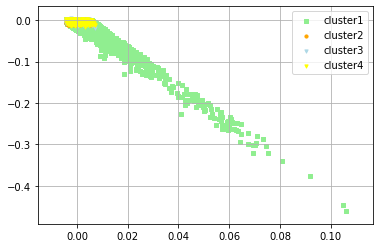

In [55]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [56]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소, 돈

2986

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

514

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 사회이슈

624

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # Influencer 논쟁

665

In [60]:
# X[:,1]
from sklearn.cluster import AgglomerativeClustering
import numpy as np

agg = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="cosine")

assign = agg.fit_predict(X)
# assign = agg.fit(X)

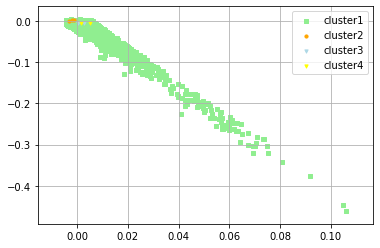

In [61]:
plt.scatter(X[assign==0,0],X[assign==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign==1,0],X[assign==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign==2,0],X[assign==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign==3,0],X[assign==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [62]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

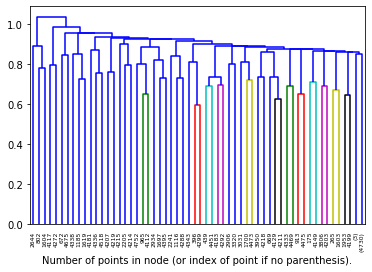

In [63]:
model1 = AgglomerativeClustering(linkage ="average", affinity="cosine", distance_threshold=0, n_clusters=None)

model1.fit(X)

plot_dendrogram(model1, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [64]:
temp_cluster_result0 = pd.DataFrame(columns=temp_heder)
temp_cluster_result0['word'] = list(model.wv.vocab)
temp_cluster_result0['cluster'] = assign
temp_cluster_result0['raw_data'] = X.tolist()

In [65]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, assign)

temp_cluster_result0['centroid'] = temp_cluster_result0['cluster'].apply(lambda x : clf.centroids_[x])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [66]:
cosine_centroid_list0 = []
for cosine_centroid in temp_cluster_result0['centroid'] :
    cosine_centroid_list0.append(cosine_centroid.tolist())

In [67]:
temp_distance0 = pairwise_distances(X,cosine_centroid_list0, metric='cosine')
temp_cluster_result0['distance'] = temp_cluster_result0.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)
temp_cluster_result0['tfidf'] = tf_idf_value
temp_cluster_result0['score'] = temp_cluster_result0.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [68]:
temp_cluster_result0[temp_cluster_result0['cluster']==0].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
167,"[0.10601557046175003, -0.46091127395629883, -0...",블록체인,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000137,0.409124,0.591013,NaN
9,"[0.10496821999549866, -0.4476616084575653, -0....",화폐,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000194,0.398654,0.601540,NaN
10,"[0.09169803559780121, -0.37547409534454346, -0...",암호,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000218,0.329393,0.670825,NaN
517,"[0.08059937506914139, -0.3413468897342682, -0....",기술,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000220,0.166710,0.833510,NaN
0,"[0.06948157399892807, -0.32006287574768066, -0...",비트코인,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000265,0.156240,0.844025,NaN
102,"[0.0752394050359726, -0.32022830843925476, -0....",거래,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000243,0.146576,0.853667,NaN
234,"[0.07095327973365784, -0.2803310453891754, -0....",서비스,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000269,0.127247,0.873022,NaN
45,"[0.05466802418231964, -0.2541303336620331, -0....",코인,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000778,0.119999,0.880779,NaN
23,"[0.059973154217004776, -0.26264211535453796, -...",거래소,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000404,0.117583,0.882822,NaN
565,"[0.06925603002309799, -0.302102655172348, -0.1...",한다,0,"[0.004248961806297302, -0.017861440777778625, ...",0.000215,0.107918,0.892296,NaN


In [69]:
temp_cluster_result0[temp_cluster_result0['cluster']==1].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1604,"[-0.0010276252869516611, 0.0029477374628186226...",본래,1,"[-0.002069879323244095, 0.0020921810064464808,...",0.298053,0.000805,1.297248,NaN
802,"[-0.0033276756294071674, 0.001047356752678752,...",의향,1,"[-0.002069879323244095, 0.0020921810064464808,...",0.363118,0.000805,1.362313,NaN
2644,"[-0.0018543369369581342, 0.0022814490366727114...",Coinfirm,1,"[-0.002069879323244095, 0.0020921810064464808,...",0.368419,0.005638,1.362781,NaN


In [70]:
temp_cluster_result0[temp_cluster_result0['cluster']==2].sort_values(by=['score']).head(20)  # 비즈니스 , 제도 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4272,"[0.002731732791289687, -0.0044191922061145306,...",교통,2,"[0.0016015897272154689, -0.004485384561121464,...",0.222373,0.000805,1.221568,NaN
4117,"[0.0004714466049335897, -0.004551577381789684,...",청약,2,"[0.0016015897272154689, -0.004485384561121464,...",0.224737,0.000805,1.223932,NaN


In [71]:
temp_cluster_result0[temp_cluster_result0['cluster']==3].sort_values(by=['score']).head(20)  # 투자자 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
672,"[0.004986704792827368, -0.004903901368379593, ...",줄줄이,3,"[0.003285420360043645, -0.004422451369464397, ...",0.194718,0.000805,1.193913,NaN
4675,"[0.001584135927259922, -0.003941001370549202, ...",요구사항,3,"[0.003285420360043645, -0.004422451369464397, ...",0.290369,0.000805,1.289563,NaN


In [72]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==0]) # 투자  비즈 거래소 

4782

In [73]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==1]) # 기타

3

In [74]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==2]) # 기타

2

In [75]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==3]) # 투자자

2

In [76]:
from sklearn import metrics
silhouette_score1 = metrics.silhouette_score(X, assign, metric='cosine')

In [77]:
silhouette_score1

0.44822368

In [78]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [79]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [80]:
kmeans.inertia_

14.916372299194336

In [81]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 1 3 ... 0 0 0]


In [82]:
cluster_values= list(model.wv.vocab)

In [83]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-14.916372299194336


In [84]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [85]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.60707134


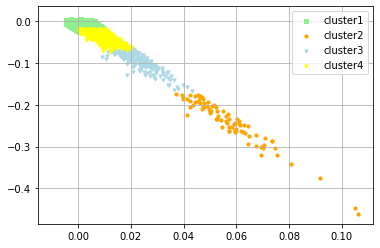

In [86]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [87]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [88]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [89]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [90]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [91]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [92]:
import scipy.spatial.distance as dist

In [93]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [94]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [95]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 사회시도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3294,"[0.0011983888689428568, -0.0032182536087930202...",blockchain,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.030762,0.012080,1.018682,NaN
2576,"[0.0037619255017489195, -0.0018719680374488235...",Haleay,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.025846,0.005638,1.020209,NaN
4227,"[9.085518104257062e-05, -0.007676770444959402,...",GBBC,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.026052,0.005638,1.020414,NaN
2299,"[0.003792111761868, -0.009987267665565014, -0....",Out,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.026542,0.005638,1.020905,NaN
3843,"[0.006247059907764196, -0.010269753634929657, ...",NET,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.026905,0.005638,1.021267,NaN
1314,"[0.0012960821622982621, -0.009053572081029415,...",NYDFS,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.026932,0.005638,1.021294,NaN
2264,"[0.0032762319315224886, -0.010386979207396507,...",Ehrsam,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.027078,0.005638,1.021440,NaN
2573,"[-0.003072533058002591, -0.007476402912288904,...",LDJ,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.027220,0.005638,1.021582,NaN
2960,"[0.00548260472714901, -0.004792058374732733, -...",NEWS,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.027241,0.005638,1.021603,NaN
2103,"[-0.001287704217247665, -0.0035627225879579782...",PSA,0,"[0.0016416218, -0.0068005715, -0.0027011717, 0...",0.027313,0.005638,1.021676,NaN


In [96]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
331,"[0.06105918437242508, -0.24600891768932343, -0...",금융,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.034386,0.094227,0.940158,NaN
581,"[0.055967800319194794, -0.23823332786560059, -...",관련,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.032758,0.075704,0.957054,NaN
1610,"[0.05953402817249298, -0.24399186670780182, -0...",개발,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.039226,0.071677,0.967549,NaN
45,"[0.05466802418231964, -0.2541303336620331, -0....",코인,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.090512,0.119999,0.970513,NaN
1253,"[0.06296132504940033, -0.2484380453824997, -0....",기반,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.046776,0.074093,0.972683,NaN
1043,"[0.05931323021650314, -0.24491892755031586, -0...",진행,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.034850,0.059597,0.975253,NaN
1108,"[0.05410207435488701, -0.23568597435951233, -0...",사용,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.030084,0.054765,0.975320,NaN
841,"[0.06087467446923256, -0.23989735543727875, -0...",또한,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.035117,0.057181,0.977936,NaN
351,"[0.0524495430290699, -0.23470249772071838, -0....",대한,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.051141,0.072483,0.978659,NaN
296,"[0.06444024294614792, -0.2503216564655304, -0....",투자,1,"[0.05706855, -0.24151891, -0.09463984, 0.08073...",0.060044,0.078120,0.981923,NaN


In [97]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 긍정전망

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
461,"[0.020717615261673927, -0.09892497956752777, -...",전망,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.028043,0.024966,1.003076,NaN
25,"[0.02765125408768654, -0.09419659525156021, -0...",기록,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.031243,0.025772,1.005472,NaN
192,"[0.02413886785507202, -0.09126300364732742, -0...",처리,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.027296,0.020134,1.007162,NaN
1561,"[0.022505978122353554, -0.09137042611837387, -...",확장,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.028999,0.020939,1.008060,NaN
599,"[0.025099817663431168, -0.09546110779047012, -...",상태,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.029050,0.020939,1.008110,NaN
645,"[0.02306036278605461, -0.10134494304656982, -0...",올해,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.031573,0.023355,1.008218,NaN
284,"[0.02343972586095333, -0.09415654838085175, -0...",전체,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.029182,0.020939,1.008243,NaN
353,"[0.022893445566296577, -0.0909368246793747, -0...",국내,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.030860,0.022550,1.008310,NaN
206,"[0.02601621113717556, -0.09481176733970642, -0...",스타트업,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.029126,0.020134,1.008992,NaN
661,"[0.02489892579615116, -0.10307038575410843, -0...",단계,2,"[0.023019059, -0.09704928, -0.038578887, 0.032...",0.029384,0.020134,1.009250,NaN


In [98]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(40,'score') # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
143,"[0.005707397125661373, -0.03734523430466652, -...",없이,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.025788,0.008859,1.016929,NaN
1639,"[0.009611076675355434, -0.03776564821600914, -...",클라우드,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.029217,0.012080,1.017137,NaN
2289,"[0.0107799731194973, -0.03996514156460762, -0....",기부,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.030082,0.012886,1.017196,NaN
537,"[0.009793033823370934, -0.03761061280965805, -...",저장,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.028616,0.010470,1.018146,NaN
359,"[0.010411594063043594, -0.03584706038236618, -...",흐름,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.028901,0.009664,1.019237,NaN
1239,"[0.010266527533531189, -0.038208331912755966, ...",자본,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.027540,0.008054,1.019486,NaN
20,"[0.006570907309651375, -0.039487358182668686, ...",오전,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.029329,0.009664,1.019665,NaN
957,"[0.012850912287831306, -0.03424663841724396, -...",긍정,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.029332,0.009664,1.019667,NaN
806,"[0.012897295877337456, -0.03903879597783089, -...",비즈니스,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.027776,0.008054,1.019722,NaN
563,"[0.008467476814985275, -0.0366639643907547, -0...",스탠리,3,"[0.008759504, -0.037188515, -0.014968162, 0.01...",0.028902,0.008859,1.020043,NaN


In [99]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #사회적 시도

3948

In [100]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #제도 한계 

80

In [101]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #긍정전망

183

In [102]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #사회 협업

578

In [103]:
agg1 = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="euclidean")

assign1 = agg1.fit_predict(X)

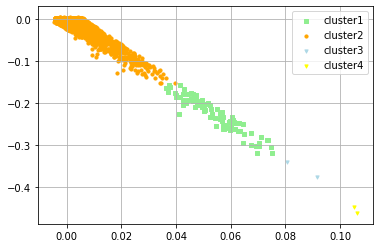

In [104]:
plt.scatter(X[assign1==0,0],X[assign1==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign1==1,0],X[assign1==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign1==2,0],X[assign1==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign1==3,0],X[assign1==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [105]:
temp_cluster_result2 = pd.DataFrame(columns=temp_heder)
temp_cluster_result2['word'] = list(model.wv.vocab)
temp_cluster_result2['cluster'] = assign1
temp_cluster_result2['raw_data'] = X.tolist()
clf1 = NearestCentroid()
clf1.fit(X, assign1)

NearestCentroid()

In [106]:
temp_cluster_result2['centroid'] = temp_cluster_result2['cluster'].apply(lambda x : clf1.centroids_[x])
euclidean_centroid_list2 = []
for euclidean_centroid in temp_cluster_result2['centroid'] :
    euclidean_centroid_list2.append(euclidean_centroid.tolist())
temp_distance2 = pairwise_distances(X,euclidean_centroid_list2, metric='euclidean')
temp_cluster_result2['distance'] = temp_cluster_result2.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [107]:
temp_cluster_result2['tfidf'] = tf_idf_value
temp_cluster_result2['score'] = temp_cluster_result2.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [108]:
temp_cluster_result2[temp_cluster_result2['cluster']==0].sort_values(by=['score']).head(20) #  거래소, 규제,-

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
351,"[0.0524495430290699, -0.23470249772071838, -0....",대한,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.033366,0.072483,0.960884,NaN
74,"[0.05620221793651581, -0.22673507034778595, -0...",가능,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.027661,0.050738,0.976923,NaN
435,"[0.05313891917467117, -0.22672216594219208, -0...",계획,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.030320,0.053154,0.977167,NaN
581,"[0.055967800319194794, -0.23823332786560059, -...",관련,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.053759,0.075704,0.978055,NaN
331,"[0.06105918437242508, -0.24600891768932343, -0...",금융,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.077498,0.094227,0.983271,NaN
201,"[0.0527326799929142, -0.2346845120191574, -0.0...",세계,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.042445,0.056375,0.986070,NaN
21,"[0.05689886584877968, -0.22126497328281403, -0...",현재,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.049042,0.062013,0.987029,NaN
547,"[0.0550721250474453, -0.21414189040660858, -0....",활용,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.051011,0.063624,0.987388,NaN
996,"[0.06043617054820061, -0.23342525959014893, -0...",결제,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.040642,0.052349,0.988293,NaN
118,"[0.04113374277949333, -0.22571733593940735, -0...",보도,0,"[0.05405411124229431, -0.228448748588562, -0.0...",0.065604,0.074899,0.990706,NaN


In [109]:
temp_cluster_result2[temp_cluster_result2['cluster']==1].sort_values(by=['score']).head(20) #  보안, 프로젝트

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2323,"[-8.860115485731512e-05, -0.013373798690736294...",DAR,1,"[0.0033079134300351143, -0.013880838640034199,...",0.026287,0.005638,1.020650,NaN
3573,"[0.005062018986791372, -0.012297163717448711, ...",Technologies,1,"[0.0033079134300351143, -0.013880838640034199,...",0.026314,0.005638,1.020677,NaN
2953,"[0.0010589229641482234, -0.0171944759786129, -...",PUBLISH,1,"[0.0033079134300351143, -0.013880838640034199,...",0.026697,0.005638,1.021060,NaN
2170,"[-0.0005494960932992399, -0.012424862012267113...",Barry,1,"[0.0033079134300351143, -0.013880838640034199,...",0.027208,0.005638,1.021571,NaN
848,"[0.00636221282184124, -0.014627782627940178, -...",Lee,1,"[0.0033079134300351143, -0.013880838640034199,...",0.027276,0.005638,1.021638,NaN
3048,"[0.006968018598854542, -0.016174063086509705, ...",Labs,1,"[0.0033079134300351143, -0.013880838640034199,...",0.027481,0.005638,1.021843,NaN
4480,"[0.0005997547996230423, -0.009529896080493927,...",GMO,1,"[0.0033079134300351143, -0.013880838640034199,...",0.027572,0.005638,1.021934,NaN
3302,"[0.0017614112002775073, -0.010678098537027836,...",간소,1,"[0.0033079134300351143, -0.013880838640034199,...",0.026011,0.004027,1.021984,NaN
4380,"[0.00502206152305007, -0.01822032406926155, -0...",케이오스,1,"[0.0033079134300351143, -0.013880838640034199,...",0.026933,0.004832,1.022100,NaN
1787,"[-0.0013682156568393111, -0.016700712963938713...",배제,1,"[0.0033079134300351143, -0.013880838640034199,...",0.025613,0.003221,1.022392,NaN


In [110]:
temp_cluster_result2[temp_cluster_result2['cluster']==2].sort_values(by=['score']).head(20) #  비즈니스, 투자, 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10,"[0.09169803559780121, -0.37547409534454346, -0...",암호,2,"[0.0861487090587616, -0.35841047763824463, -0....",0.077591,0.329393,0.748198,NaN
517,"[0.08059937506914139, -0.3413468897342682, -0....",기술,2,"[0.0861487090587616, -0.35841047763824463, -0....",0.077591,0.166710,0.910881,NaN


In [111]:
temp_cluster_result2[temp_cluster_result2['cluster']==3].sort_values(by=['score']).head(20) #  암호화폐 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
167,"[0.10601557046175003, -0.46091127395629883, -0...",블록체인,3,"[0.10549189150333405, -0.45428645610809326, -0...",0.04472,0.409124,0.635596,NaN
9,"[0.10496821999549866, -0.4476616084575653, -0....",화폐,3,"[0.10549189150333405, -0.45428645610809326, -0...",0.04472,0.398654,0.646066,NaN


In [112]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==0]) # 거래소, 규제 

81

In [113]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==1]) # 보안 / PJT

4704

In [114]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==2]) # 비즈니스 , 투자 

2

In [115]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==3]) # 암호화폐 

2

In [ ]:
silhouette_score2 = metrics.silhouette_score(X, assign1, metric='euclidean')

In [ ]:
silhouette_score2

In [117]:
silhouette_score2

0.8864621